# **02_Data Cleaning**

## Objectives

* Analyse and visualise the distribution of data
* Clean the data

## Inputs

* Raw data generated from "01_DataCollection". Saved as: inputs\datasets\raw\asthma_disease_data.csv

## Outputs

* Generation of cleaned data to be saved as "outputs\data\interim\cleaned_asthmadata.csv"


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/AsthmaBurden/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/AsthmaBurden'

## Imports
---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
---

Load the data and drop "DoctorInCharge" as not needed for analyses.

In [5]:
df = (
    pd.read_csv("inputs/datasets/raw/asthma_disease_data.csv")
      .drop(['DoctorInCharge', 'PatientID'], axis=1)
)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   int64  
 15

Check for duplicates

In [7]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


# Check for missing data

---

Check the level of missing data across the whole dataset.

In [8]:
print("Number of missing values for each variable in the dataset:")

missing_count = df.isna().sum()

missing_data = pd.DataFrame({
    'Missing Values': missing_count
})

print(missing_data)

Number of missing values for each variable in the dataset:
                        Missing Values
Age                                  0
Gender                               0
Ethnicity                            0
EducationLevel                       0
BMI                                  0
Smoking                              0
PhysicalActivity                     0
DietQuality                          0
SleepQuality                         0
PollutionExposure                    0
PollenExposure                       0
DustExposure                         0
PetAllergy                           0
FamilyHistoryAsthma                  0
HistoryOfAllergies                   0
Eczema                               0
HayFever                             0
GastroesophagealReflux               0
LungFunctionFEV1                     0
LungFunctionFVC                      0
Wheezing                             0
ShortnessOfBreath                    0
ChestTightness                       0
Cough

The dataset contains no missing values across the 28 variables of interest. 

# Summary Statistics

---

Due to the nature of the dataset, all variables are numeric. Binary variables have been labelled as int64, with continuous or linear variables labelled as float64.

- For numerical features (float), mean, standard deviation, minimum, median, interquartile range, and maximum values were reported to identify potential outliers or inconsistencies.

- For categorical features (integer), counts and most frequent categories were reported to understand the spread of patients and dominant groups.

## Updating categorisation of variables

Updating age from an integer to a float:

In [9]:
df = df.astype({'Age': 'float64'})
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   float64
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   int64  
 15

Generation of summary statistics for float variables:

In [10]:
float_cols = df.select_dtypes(include=["float"]).columns
print(float_cols)

df[float_cols].describe()

Index(['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure',
       'LungFunctionFEV1', 'LungFunctionFVC'],
      dtype='str')


,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,42.137960,27.244877,5.051786,5.022867,7.019012,5.013030,5.114221,4.981864,2.548564,3.741270
std,21.606655,7.201628,2.903574,2.909980,1.732475,2.935605,2.893088,2.859192,0.861809,1.303689
min,5.000000,15.031803,0.001740,0.003031,4.001437,0.001022,0.000659,0.002434,1.000459,1.500045
25%,23.000000,20.968313,2.578333,2.432043,5.498500,2.432559,2.599996,2.467489,1.824113,2.607489
50%,42.000000,27.052202,5.016881,5.115383,6.975839,5.036519,5.098452,4.903278,2.553244,3.734982
75%,61.000000,33.555903,7.540234,7.544216,8.526950,7.630037,7.708836,7.432218,3.292897,4.864121
max,79.000000,39.985611,9.995809,9.999904,9.996235,9.998964,9.999555,9.999708,3.999719,5.999421


Show the distribution of each float variable, alongside the mean, IQR and KDE:

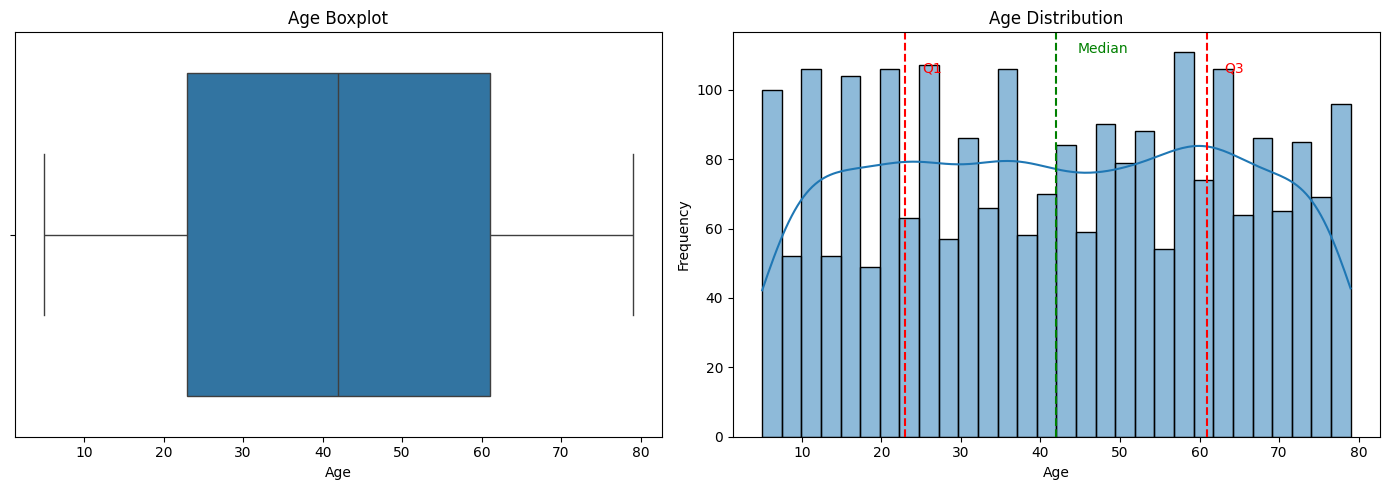

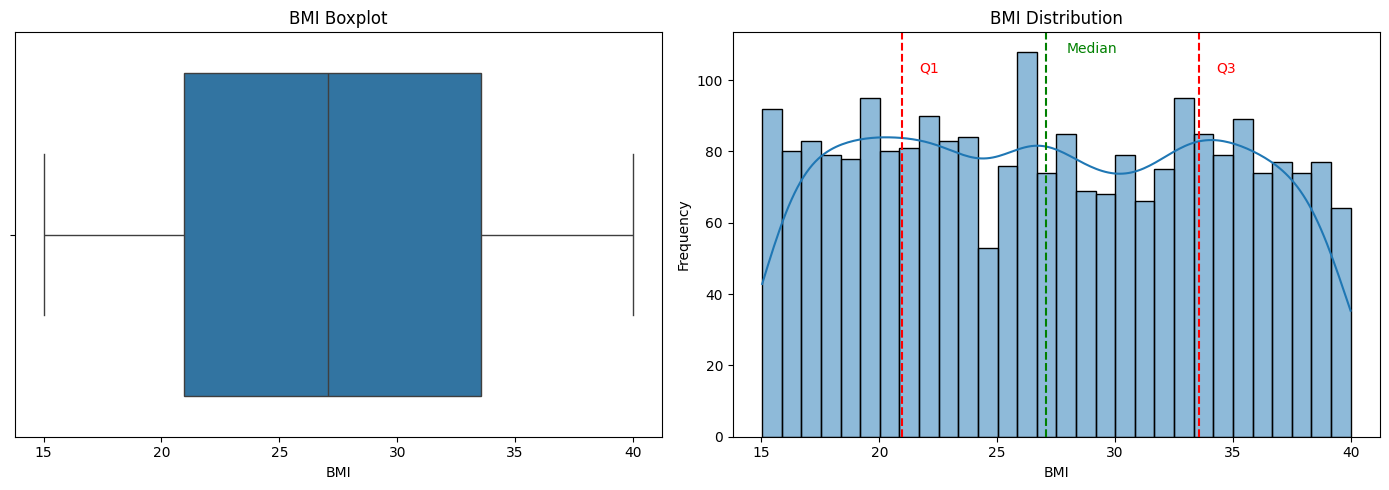

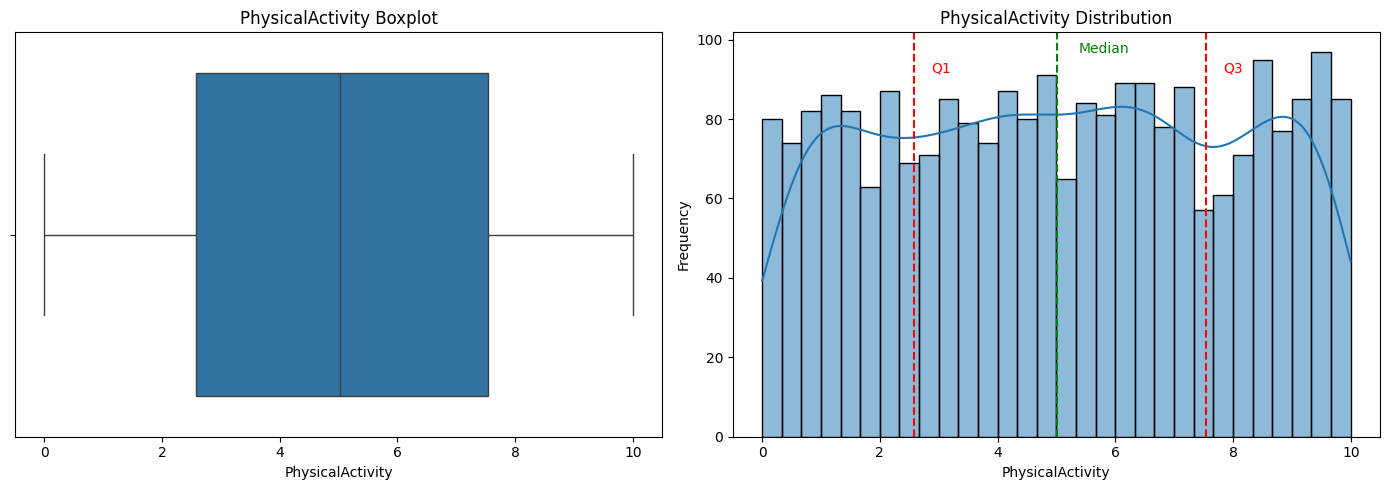

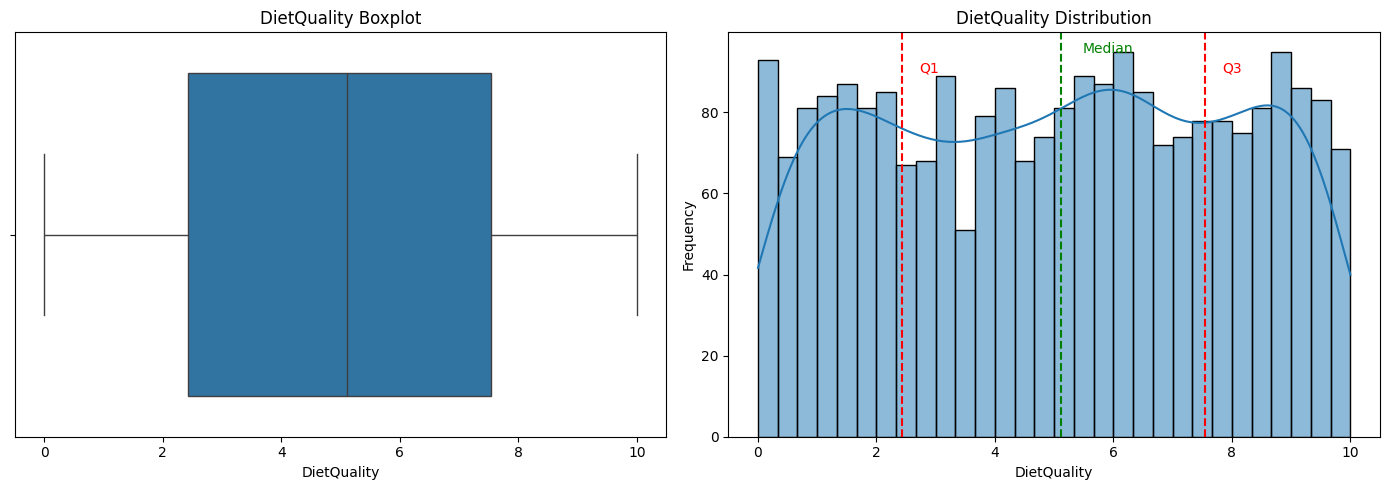

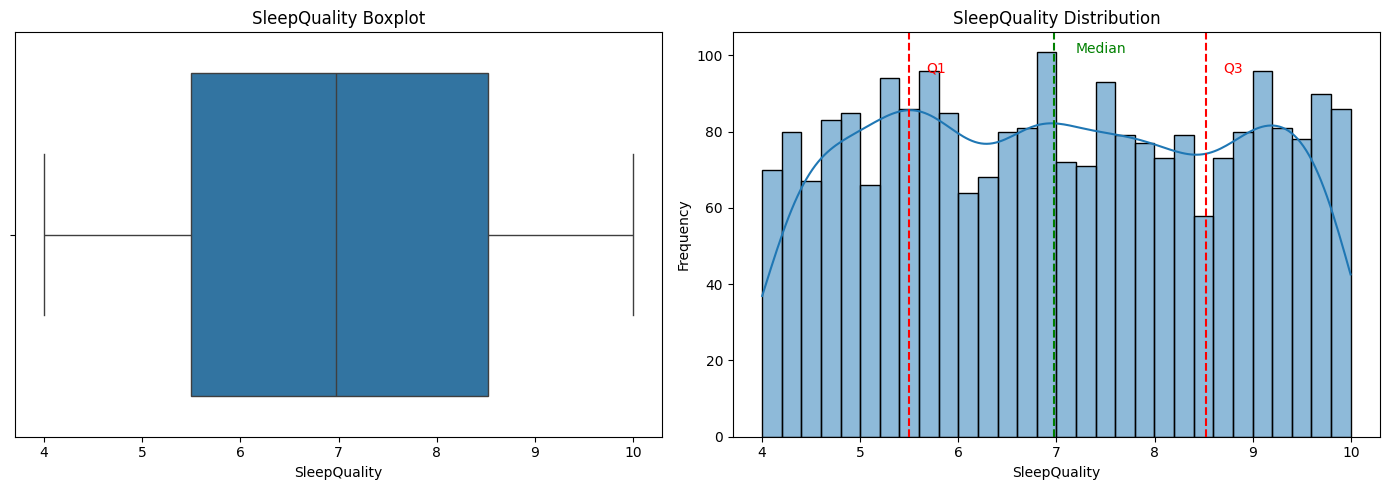

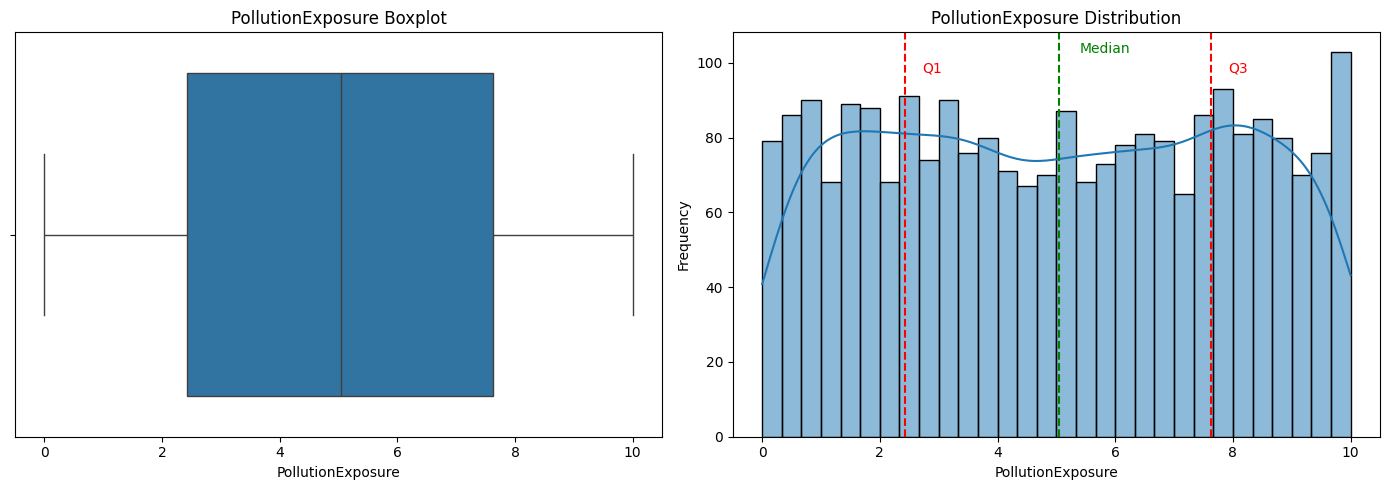

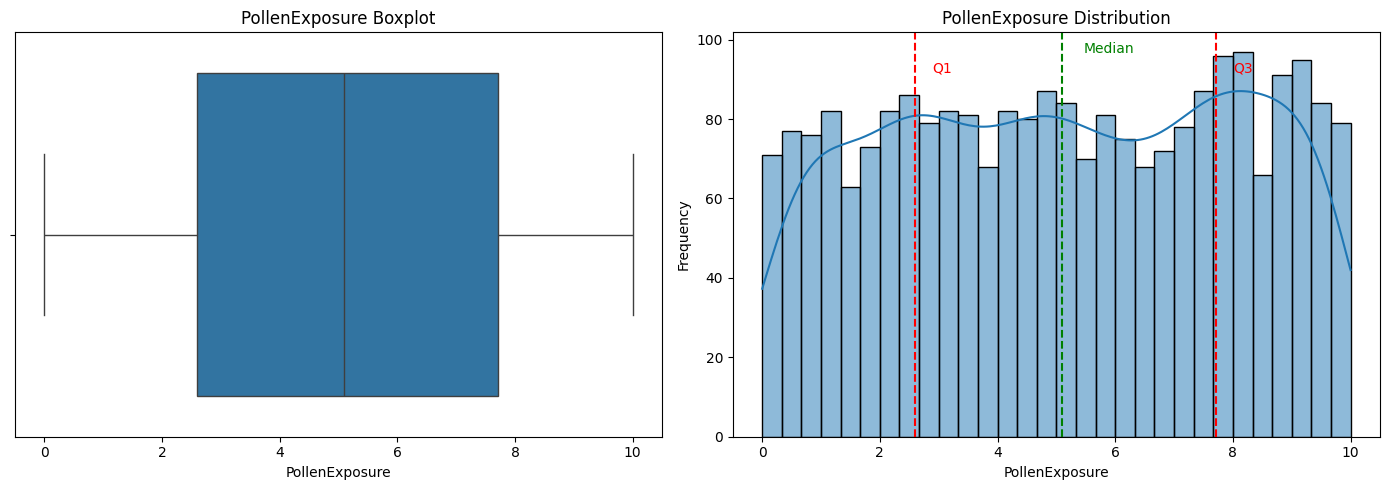

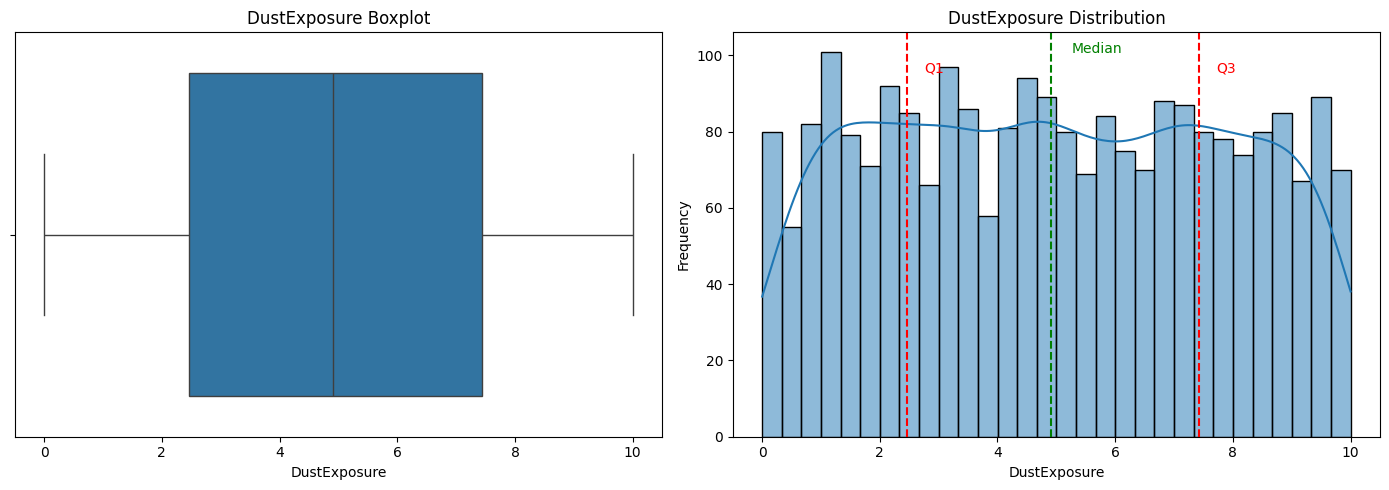

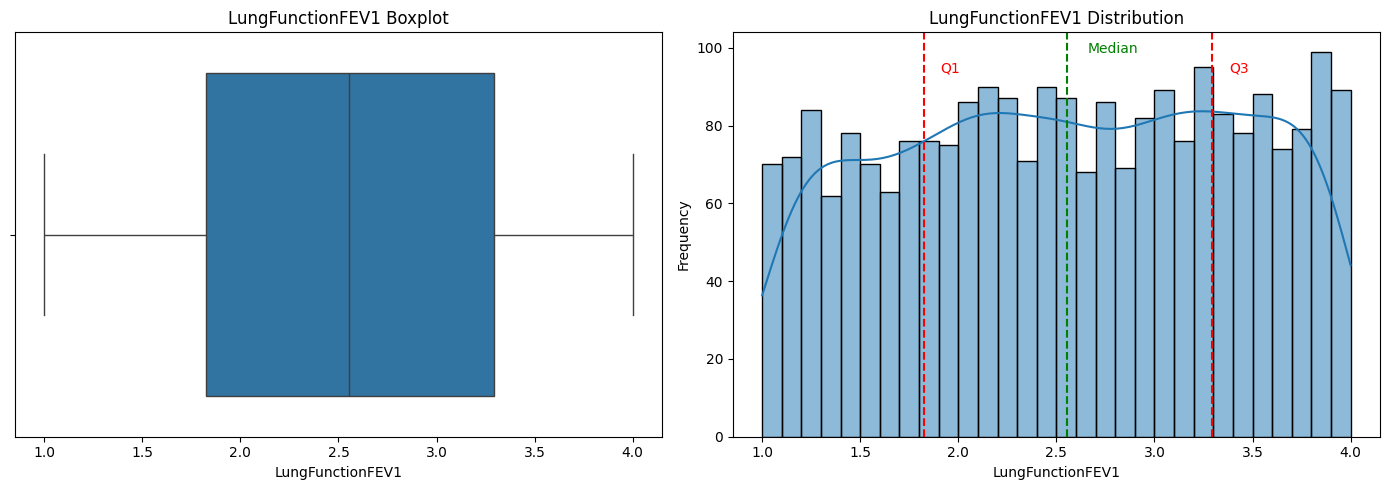

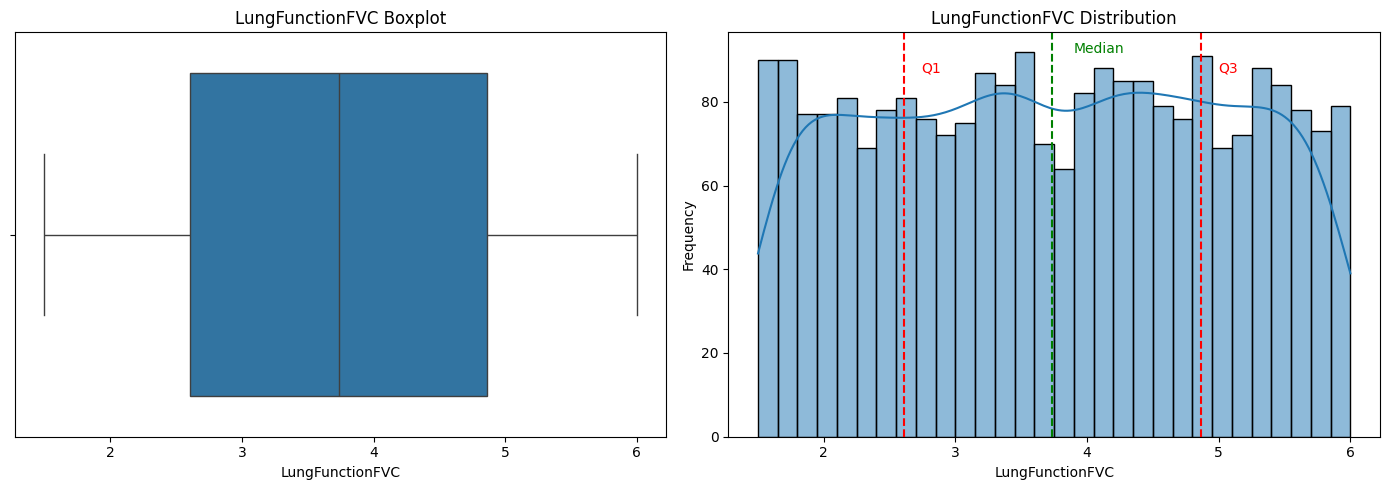

In [11]:
# Adapted from the code institute content
float_cols = df.select_dtypes(include="float").columns

for col in float_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # --- Left: Boxplot ---
    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f"{col} Boxplot")
    axes[0].set_xlabel(col)

    # --- Right: Histogram ---
    sns.histplot(df[col], bins=30, kde=True, ax=axes[1])
    axes[1].set_title(f"{col} Distribution")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frequency")

    # Median
    median = df[col].median()
    axes[1].axvline(median, color="g", linestyle="dashed", linewidth=1.5)
    axes[1].text(
        median + df[col].std() / 8,
        axes[1].get_ylim()[1] * 0.95,
        "Median",
        color="g",
    )

    # IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Q1
    axes[1].axvline(Q1, color="r", linestyle="dashed", linewidth=1.5)
    axes[1].text(
        Q1 + df[col].std() / 10,
        axes[1].get_ylim()[1] * 0.90,
        "Q1",
        color="r",
    )

    # Q3
    axes[1].axvline(Q3, color="r", linestyle="dashed", linewidth=1.5)
    axes[1].text(
        Q3 + df[col].std() / 10,
        axes[1].get_ylim()[1] * 0.90,
        "Q3",
        color="r",
    )

    plt.tight_layout()
    plt.show()


Results:
- Age, BMI, PhysicialActivity, DietQuality, SleepQuality, PollutionExposure, PollenExposure, DustExposure, LungFunctionFEV1 and LungFunctionFVC have multi-modal distrubution, which is indicative of subgroups or patterns in the data.
- No outliers noted.

Map the relevant codes for the variables:

In [12]:
encoding_maps = {
    # Binary (0/1)
    "Gender": {0: "Male", 1: "Female"},
    "Smoking": {0: "No", 1: "Yes"},
    "PetAllergy": {0: "No", 1: "Yes"},
    "FamilyHistoryAsthma": {0: "No", 1: "Yes"},
    "HistoryOfAllergies": {0: "No", 1: "Yes"},
    "Eczema": {0: "No", 1: "Yes"},
    "HayFever": {0: "No", 1: "Yes"},
    "GastroesophagealReflux": {0: "No", 1: "Yes"},
    "Wheezing": {0: "No", 1: "Yes"},
    "ShortnessOfBreath": {0: "No", 1: "Yes"},
    "ChestTightness": {0: "No", 1: "Yes"},
    "Coughing": {0: "No", 1: "Yes"},
    "NighttimeSymptoms": {0: "No", 1: "Yes"},
    "ExerciseInduced": {0: "No", 1: "Yes"},
    "Diagnosis": {0: "No", 1: "Asthma"},

    # Multi-class categorical
    "Ethnicity": {
        0: "Caucasian",
        1: "African American",
        2: "Asian",
        3: "Other"
    },
    "EducationLevel": {
        0: "None",
        1: "High School",
        2: "Bachelor's",
        3: "Higher"
    }
}

Generation of summary statistics for integer variables. Data summarised in table format, highlighting the most frequency category:

In [13]:
int_cols = df.select_dtypes(include=["int"]).columns

print(int_cols)

int_categorical = int_cols
summary = []


for col in int_categorical:
    counts = df[col].value_counts()
    prop = (counts / counts.sum() * 100).round(2)

    mapping = encoding_maps.get(col, {})

    counts_labeled = {
        mapping.get(k, k): v for k, v in counts.to_dict().items()
    }
    prop_labeled = {mapping.get(k, k): v for k, v in prop.to_dict().items()}
    most_freq = mapping.get(counts.idxmax(), counts.idxmax())

    summary.append(
        {
            "Feature": col,
            "Encoding": (
                ", ".join([f"{k}={v}" for k, v in mapping.items()])
                if mapping
                else "Numeric"
            ),
            "Most_Frequent": most_freq,
            "Counts": counts_labeled,
            "Proportions (%)": prop_labeled,
        }
    )

summary_df = pd.DataFrame(summary)
summary_df

Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='str')


,Feature,Encoding,Most_Frequent,Counts,Proportions (%)
0,Gender,"0=Male, 1=Female",Male,"{'Male': 1212, 'Female': 1180}","{'Male': 50.67, 'Female': 49.33}"
1,Ethnicity,"0=Caucasian, 1=African American, 2=Asian, 3=Other",Caucasian,"{'Caucasian': 1465, 'African American': 475, '...","{'Caucasian': 61.25, 'African American': 19.86..."
2,EducationLevel,"0=None, 1=High School, 2=Bachelor's, 3=Higher",High School,"{'High School': 933, 'Bachelor's': 749, 'None'...","{'High School': 39.01, 'Bachelor's': 31.31, 'N..."
3,Smoking,"0=No, 1=Yes",No,"{'No': 2053, 'Yes': 339}","{'No': 85.83, 'Yes': 14.17}"
4,PetAllergy,"0=No, 1=Yes",No,"{'No': 1995, 'Yes': 397}","{'No': 83.4, 'Yes': 16.6}"
5,FamilyHistoryAsthma,"0=No, 1=Yes",No,"{'No': 1672, 'Yes': 720}","{'No': 69.9, 'Yes': 30.1}"
6,HistoryOfAllergies,"0=No, 1=Yes",No,"{'No': 1437, 'Yes': 955}","{'No': 60.08, 'Yes': 39.92}"
7,Eczema,"0=No, 1=Yes",No,"{'No': 1933, 'Yes': 459}","{'No': 80.81, 'Yes': 19.19}"
8,HayFever,"0=No, 1=Yes",No,"{'No': 1786, 'Yes': 606}","{'No': 74.67, 'Yes': 25.33}"
9,GastroesophagealReflux,"0=No, 1=Yes",No,"{'No': 2014, 'Yes': 378}","{'No': 84.2, 'Yes': 15.8}"


Show the distribution of each integer variable:

* Gender bar plot


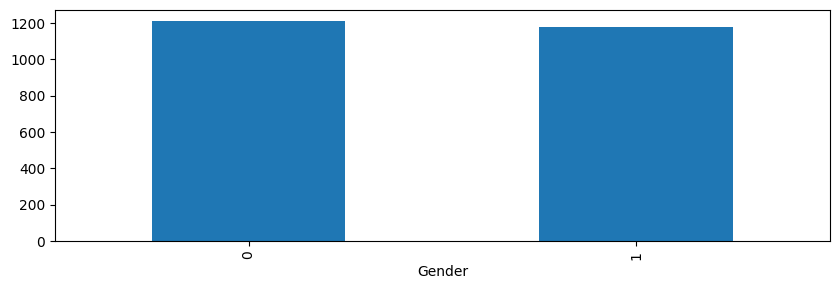




* Ethnicity bar plot


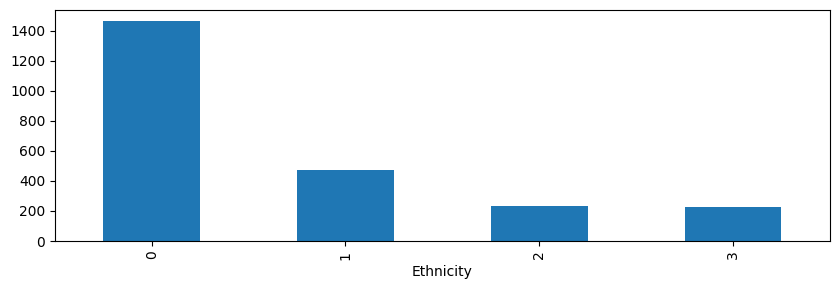




* EducationLevel bar plot


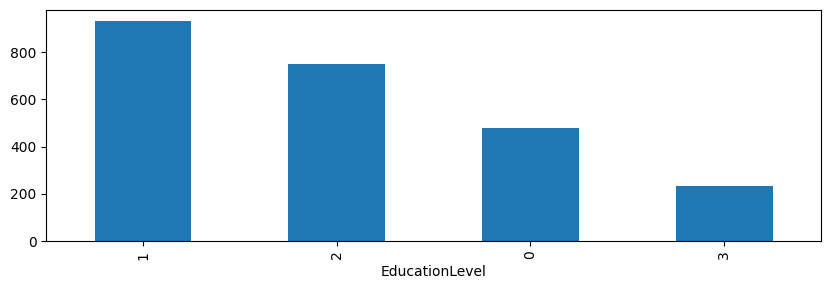




* Smoking bar plot


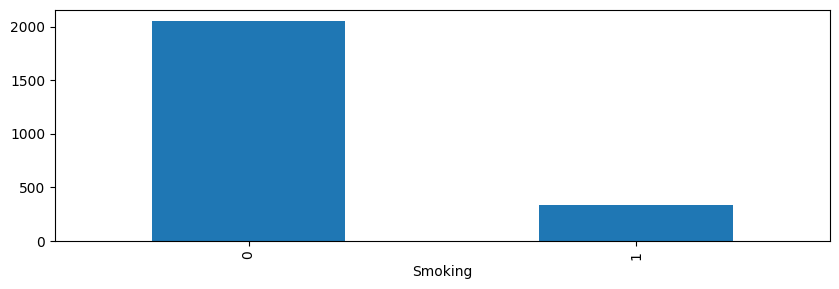




* PetAllergy bar plot


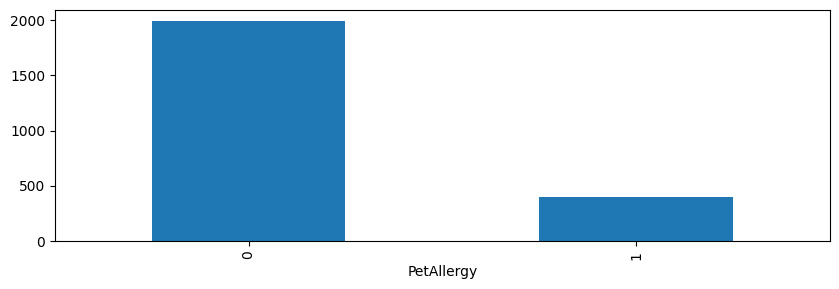




* FamilyHistoryAsthma bar plot


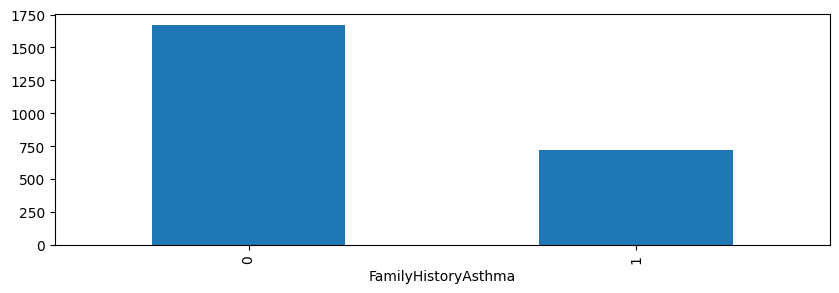




* HistoryOfAllergies bar plot


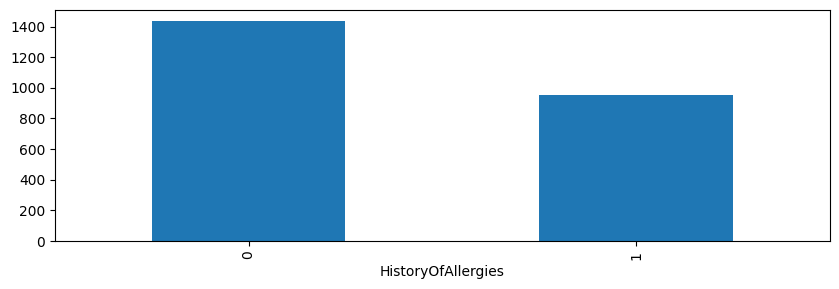




* Eczema bar plot


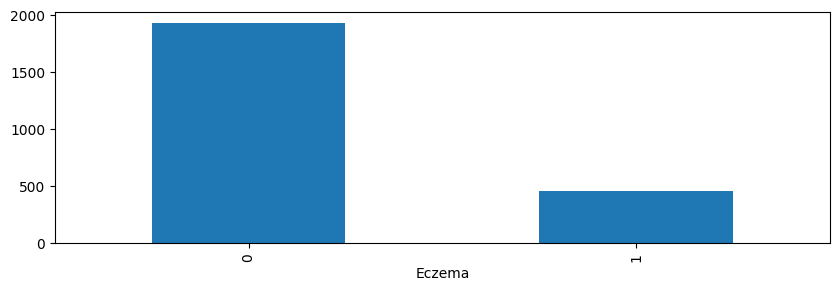




* HayFever bar plot


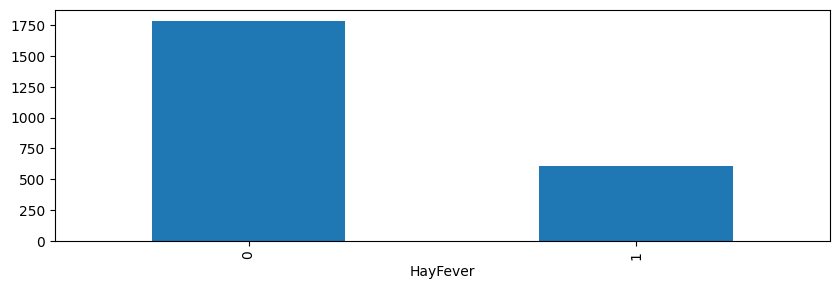




* GastroesophagealReflux bar plot


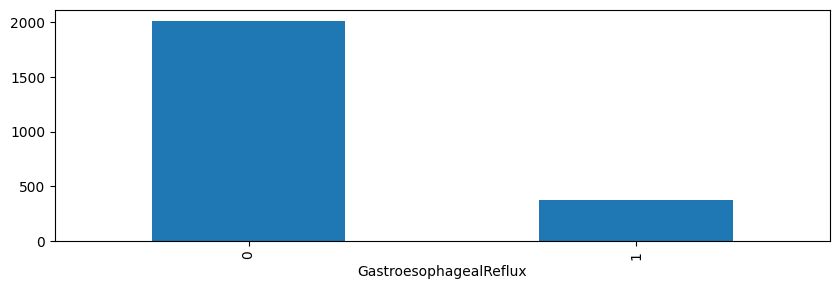




* Wheezing bar plot


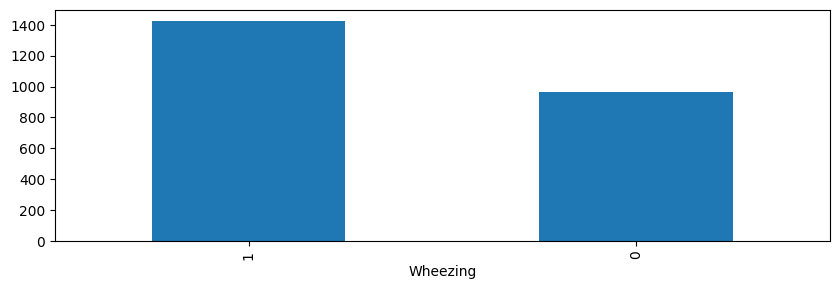




* ShortnessOfBreath bar plot


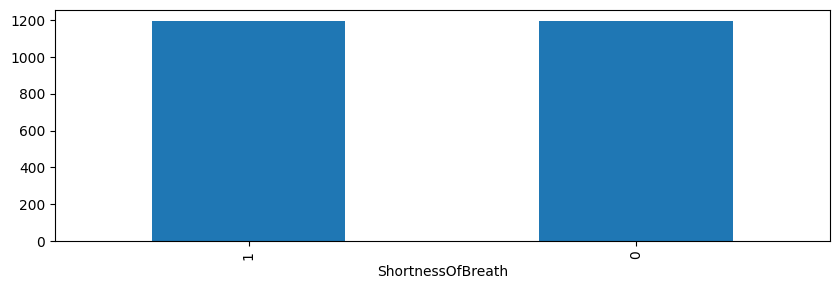




* ChestTightness bar plot


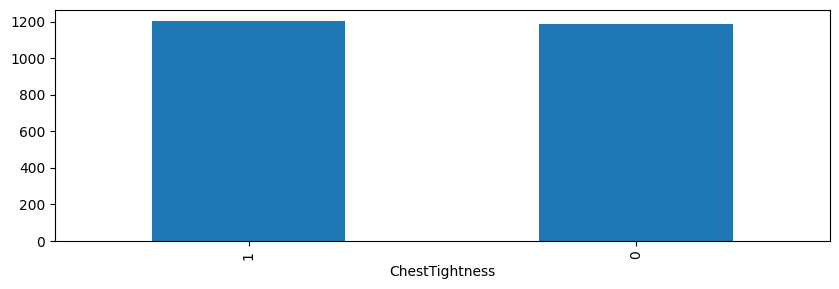




* Coughing bar plot


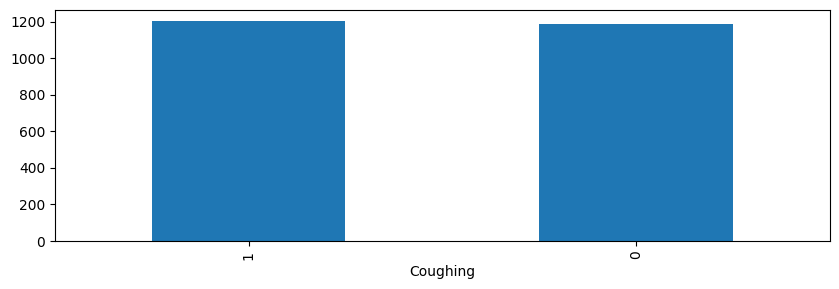




* NighttimeSymptoms bar plot


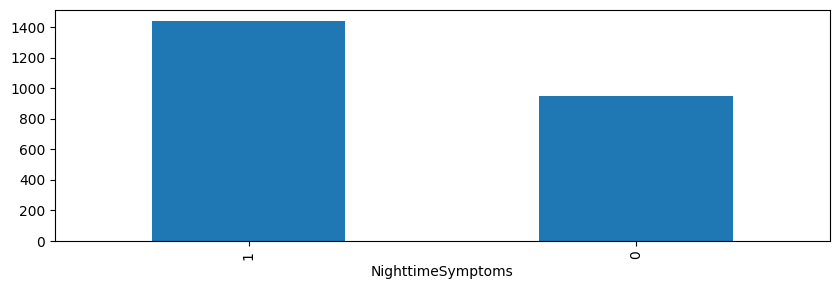




* ExerciseInduced bar plot


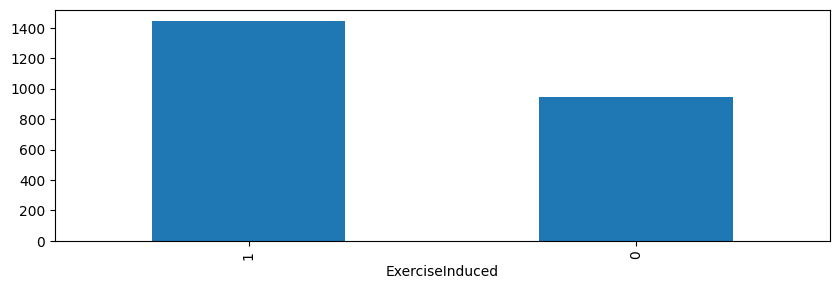




* Diagnosis bar plot


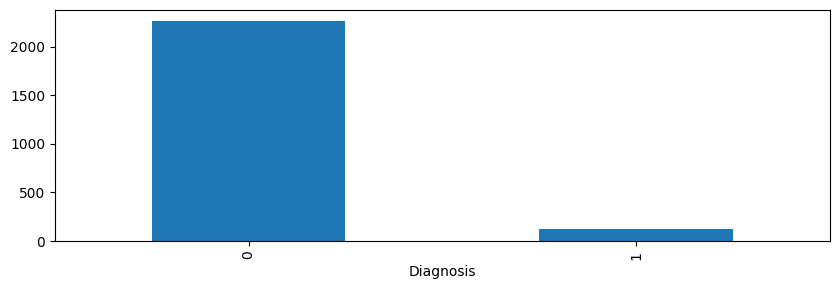

In [14]:
for col in df.select_dtypes(include='int').columns:
    df.value_counts(col).plot(kind='bar', figsize=(10, 3))
    print(f"* {col} bar plot")
    plt.show()
    print("\n\n")

Observations from this dataset:
* Gender: Balanced proportions, almost a 50-50 split of males and females. 
* Ethnicity: Mostly Caucasian sample, other groups less represented. May need to be grouped for analyses.
* EducationLevel: Third of patients atleast high school education. None and Higher represent a small proportion of the sample and may need grouping.
* Smoking: Mostly non-smokers, strong imbalance.
* PetAllergy: Most patients do not have pet allergies, strong imbalance.
* FamilyHistoryAsthma: Around one-third of patients have family history of asthma, some imbalance.
* HistoryOfAllergies: Around three-fifths of patients do no have history of allergies, some imbalance.
* Eczema: Most patients had no history of eczema, strong imbalance.
* HayFever: Most patients had no history of hayfever, strong imbalance.
* GastroesophagealReflux: Most patients had no history of gastroesophageal reflux, strong imbalance.
* Wheezing: Around three-fifths of patients have wheezing, some imbalance.
* ShortnessOfBreath, ChestTightness and Cought: Balanced proportions, almost a 50-50 split of males and females. 
* ExerciseInduced: Around three-fifths of patients have have exercise induced asthma, some imbalance.
* Diagnosis (TARGET): Most patients did not have asthma, highly imbalanced target. Issues for modelling meaning imbalance will need to be handled.

# Push files to Repo
---

Save the cleaned data in outputs/datasets/cleaned

In [15]:
import os
try:
    os.makedirs('outputs/datasets/cleaned', exist_ok=True)  
except Exception as e:
    print(e)

df.to_csv("outputs/datasets/cleaned/asthma_disease_data_cleaned.csv", index=False)

# Conclusion and Next Steps
---

The asthma disease dataset appears well-structured and complete, with no missing data. Numerical variables are stored using appropriate data types; with box plots identifying no outliers. Additionally, although Categorical variables are stored as integers, they represent categorical infromation rather than true numerical quantitites, and will treated accordingly during analysis and modelling.

Summary statistics indicate multi-modal distributions,, highlighting suitability for analyses.

Duplicate check across patient IDs noted no duplicates; therefore ensures confidence that each row represents a patient. 

Next Steps:
- Business Requirement One: Conduct exploratory data analysis (EDA) to identify the relationships between features and asthma status.